# Load all notebooks with Functions

In [0]:
%run /Users/pnl0rc8b@emea.royalahold.net/FINALIZED_Notebooks/Functions_Finalized

In [0]:
%run /Users/pnl0rc8b@emea.royalahold.net/FINALIZED_Notebooks/Functions_Tables

# Configure Parameters

In [0]:
# PARAMETERS

ATTRIBUUT = "ndAddedSugar" # Selecteer Attribuut om te TRAINEN                                              ndTypeOfGrain       ndAnimalSpecies
numerieke_features = ['']#['SUGAR_was_missing','SUGAR_UOM_class','SUGAR']#['FIBER','FIBER_was_missing','Fiber_UOM_class','PROTEINE'] # Deze numerieke features nemen we mee in het trainingsprocess, leeg is ook mogelijk --> []

SAVE_MODEL = False #True # Wil je een oud model overschrijven met een nieuwe?
EPOCHS = 100

Classes_threshold = 11
Overig_threshold = 200 # Class beneden deze threshold, zal worden toegevoegd aan class: 'overig'

Upsample_size_TRAIN = 4000
Upsample_size_VAL = 1000
Upsample_size_TEST = 1000

balance_threshold_single_label = 500
upsample_single_label = 5000

downsampeling_needed = False

# Indien andere numeriek features dan -> nutrienten is gewenst, zie dan:
# 'Functions_Rebuild -> Tables' voeg hier de extra Table dan toe
save_numerical_features_(SAVE_MODEL,ATTRIBUUT, numerieke_features)
if numerieke_features == ['']:
    numerieke_features = []

gtin,gln,sgIngredientsRequiredIndicator,GPC,GPC_omschrijving,ndFoodNonFood,regulated_product_name,functional_name,label_description,trade_item_description,ingredients,description_short,consumer_usage_instruction,trade_item_feature_benefit,marketing_message,preparation_type,preparation_instruction,toevoegingen_ingredienten
16229901226,1094207999990,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3574661592015,8715900000013,null,10000320,vrouwelijke hygiëne - tampons,Non Food,,tampon pcomf,tampon pcomf,ob tamp procomfort super 16,,ob tamp procomfort super 16,,,,,,
3760278203585,1094207999990,null,,,Food,,,,fav yudeta sakana,,,,,,,,
3760278205855,1094207999990,null,,,Food,,,,fav veggie gyoza,,,,,,,,
4002239683005,8712423020030,true,10000272,groenten - bereid/bewerkt (houdbaar),Food,spaanse artisjokbodems mild gekruid,spaanse artisjokbodems,dittmann spaanse artisjokbodems,dittmann spaanse artisjokbodems 390g,"ingrediënten: artisjokbodems, water, zout, voedingszuur: citroenzuur. zonder conserveringsstoffen.",dittmann spaanse artisjokbodems,,,,,,
4005808223411,8715200000003,null,10000356,vochtinbrengende producten,Non Food,,crème,nivea men protect & care hydraterende gezichtscreme 75ml,nivea men protect & care hydraterende gezichtscreme 75ml,,nivea men protect & care hydrateren,• apply liberally on your face and neck area. also suitable for use after shaving. • for best results prepare your skin with nivea men protect & care face wash gel or face scrub.,hydrateert de huid onmiddellijk beschermt de natuurlijke huidbarrière om vocht vast te houden verzacht en herstelt de huid direct na het scheren niet vettig en trekt snel in,"voor mannen die hun huidwillen beschermen tegen het effect van regelmatig scheren, externe invloeden van wind, regen en veranderende temperaturen. de formule met aloë vera en pro-vitamine b5 verzorgt en beschermt de huid tegen externe invloeden die haar uitdrogen.",,,
4008233112657,8712585000000,null,10000813,lichaamsreiniging - overig,Non Food,douche,douche,douche relaxing 200 ml,"kneipp douche relaxing, lavendel 200 ml fles",,douche relaxing 200 ml,,,,,,
4009887221702,8715297088496,null,,,Food,wine,,,,contains sulphites.,,,,,,,
4104480469138,8712423034358,null,10005844,medische hulpmiddelen,Non Food,,keelpastilles,isla junior 20 keelpastilles,isla junior 20 keelpastilles,,isla junior 20 keelpastilles,voor kinderen vanaf 4 jaar.,,voor kinderen vanaf 4 jaar,,,
4395721505900,8710206000019,null,10000928,gedrukte tijdschriften en kranten,Non Food,,tijdschrift,creatief met patchwork,creatief met patchwork,,creatief met patchwo,,,,,,


/databricks/spark/python/pyspark/sql/dataframe.py:146: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
 warnings.warn(
(49163, 20)
Shape van DF (row, columns) (34656, 8)

# Training Process loop

Downsamepling gebruiken als je een attribuut hebt die hele ongebalanceerde classes hebt (bijv. 5000 True, 5000 False en 20000 Empty), alles wordt dan even groot als de kleinste class (equal_classes_downsample). Als dit niet nodig is dan gebruik je imbalance_check_single_label. Zet boolean downsampeling_need op True in cmd 5 indien gewenst.

Amount of rows: (35351, 'Amount of columns: ', 139)
/databricks/spark/python/pyspark/sql/pandas/conversion.py:210: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df[column_name] = series
/databricks/spark/python/pyspark/sql/pandas/conversion.py:210: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df[column_name] = series
/databricks/spark/python/pyspark/sql/pandas/conversion.py:210: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df[column_name] = series
/databricks/spark/python/pyspark/sql/pandas/conversion.py:210: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df[column_name] = series
/databricks/spark/python/pyspark/sql/pandas/conversion.py:210: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df[column_name] = series
/databricks/spark/python/pyspark/sql/pandas/conversion.py:210: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df[column_name] = series
/databricks/spark/python/pyspark/sql/pandas/conversion.py:210: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df[column_name] = series
/databricks/spark/python/pyspark/sql/pandas/conversion.py:210: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df[column_name] = series
/databricks/spark/python/pyspark/sql/pandas/conversion.py:210: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df[column_name] = series
/databricks/spark/python/pyspark/sql/pandas/conversion.py:210: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 df[column_name] = series
/databricks/spark/python/pyspark/sql/pandas/conversion.py:210: PerformanceWarning: DataFrame is highly fragmented. This is usually the result of calling `frame.insert` many times, which has poor performance. Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, 

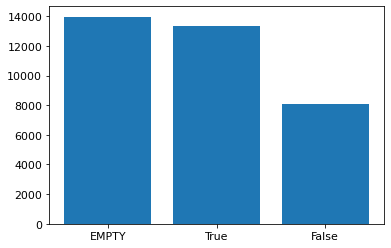

null entries = 0
Shape van dataframe: (23538, 27)
null entries = 400

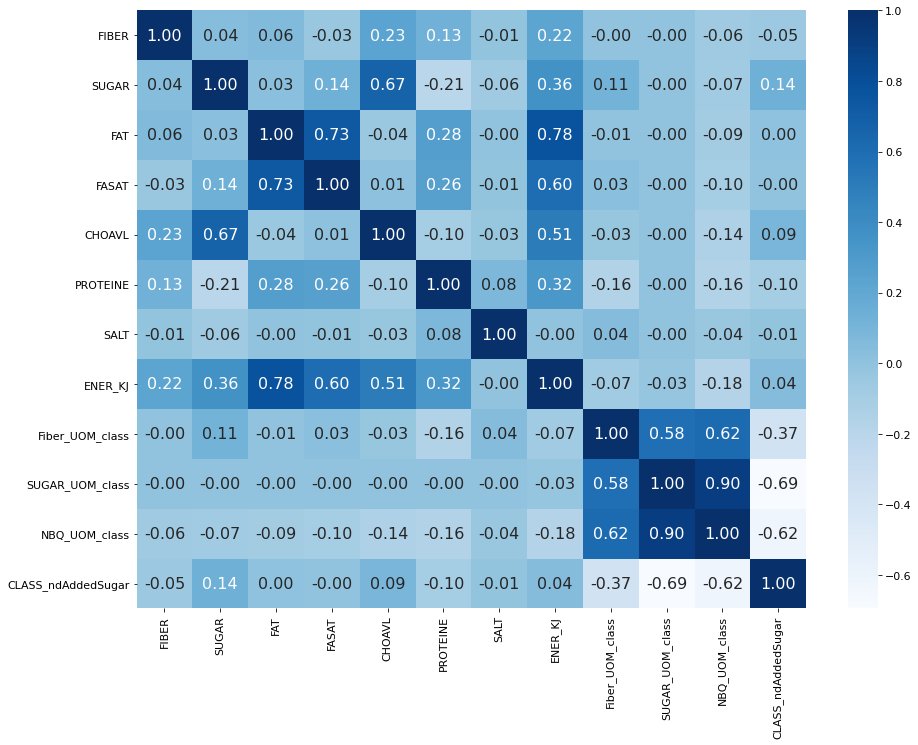

Vocab size: 39801.0
Vocabular size: 39801.0
Numerical Features: Index([], dtype='object')
Shape Numerical Features: (23138, 0)
Shape Text Features: (23138, 301)
Shape Targets: (23138, 3)
<command-3325852567044194>:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
 X_train = np.array(list(zip(X_train_num, X_train_text)))
(16196, 2) (3471, 2) (3471, 2)
(16196, 3) (3471, 3) (3471, 3)

In [0]:
# Formateer
nd_controle = koppel_ndAttributen_new_products(NASA_CONTROLE)
df_geformateerd, multi_label_flag,classes_available = create_overige_class(nd_controle, ATTRIBUUT,Classes_threshold, Overig_threshold)

DF_merged = koppel_preprocessed_text(df_geformateerd, DF_NLP_spark)
DF_merged = fix_empty_fields(DF_merged, ATTRIBUUT)
DF_merged = Correlation_matrix(DF_merged, ATTRIBUUT, show_nan_plot=False, show_correlation_matrix=True)

#Prepare for trainimg
vocab_size = get_vocabulary_size(DF_merged)

if multi_label_flag == True:
    X_train, X_val, X_test, y_train, y_val, y_test, targets = total_split(DF_merged, numerieke_features, ATTRIBUUT)
else:
    if downsampeling_needed == True:
        DF_merged = equal_classes_downsample(classes_available, DF_merged)
    else:
        DF_merged = imbalance_check_single_label(classes_available, DF_merged, upsample_single_label)
    ytrain, yval, ytest, Xtrain_num, Xtrain_text, Xval_num, Xval_text, Xtest_num, Xtest_text = single_prep(numerieke_features, DF_merged, ATTRIBUUT)

In [0]:
if multi_label_flag == True:
    classes = DF_merged['overig'].value_counts().index.tolist() # haal [0,1] en [1,0] als class eruit
    X_train, y_train = balance_multi_label(targets, y_train, X_train, classes, Upsample_size_TRAIN, balance_set = "TRAIN-SET") # Balance each sub-class TRAINING
    X_val, y_val = balance_multi_label(targets, y_val, X_val, classes, Upsample_size_VAL, balance_set = "VALIDATION-SET") # Balance each sub-class VALIDATION
    X_test, y_test = balance_multi_label(targets, y_test, X_test, classes, Upsample_size_TEST, balance_set = "TEST-SET") # Balance each sub-class TEST

    train_accuracies, val_accuracies, train_loss, val_loss,class_names, model = TRAINING_multi_label(X_train, X_val, X_test, y_train, y_val, y_test, numerieke_features, vocab_size, ATTRIBUUT, SAVE_MODEL) # Start training the model --> Multi label
else:
    model, model_history = TRAINING_single_label(Xtrain_num, Xtrain_text, Xval_num, Xval_text, Xtest_num, Xtest_text, vocab_size, EPOCHS, SAVE_MODEL)


**************** SINGLE LABEL MODEL ***************

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_4 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_1 (Embedding) (None, 301, 4) 159204 ['input_4[0][0]'] 
 
 flatten_1 (Flatten) (None, 1204) 0 ['embedding_1[0][0]'] 
 
 input_3 (InputLayer) [(None, 0)] 0 [] 
 
 dropout_4 (Dropout) (None, 1204) 0 ['flatten_1[0][0]'] 
 
 dropout_3 (Dropout) (None, 0) 0 ['input_3[0][0]'] 
 
 concatenate_1 (Concatenate) (None, 1204) 0 ['dropout_4[0][0]', 
 'dropout_3[0][0]'] 
 
 dense_4 (Dense) (None, 30) 36150 ['concatenate_1[0][0]'] 
 
 dense_5 (Dense) (None, 50) 1550 ['dense_4[0][0]'] 
 
 dense_6 (Dense) (None, 20) 1020 ['dense_5[0][0]'] 
 
 dropout_5 (Dropout) (None, 20) 0 ['dense_6[0][0]'] 
 
 dense_7 (Dense) (None, 3) 63 ['dropout_5[0][0]'] 
 
==================================================================================================
Total params: 197,987
Trainable params: 197,987
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/100
507/507 - 3s - loss: 0.9796 - accuracy: 0.5475 - val_loss: 0.8181 - val_accuracy: 0.6237 - 3s/epoch - 6ms/step
Epoch 2/100
507/507 - 2s - loss: 0.7507 - accuracy: 0.6497 - val_loss: 0.6422 - val_accuracy: 0.7093 - 2s/epoch - 4ms/step
Epoch 3/100
507/507 - 2s - loss: 0.6777 - accuracy: 0.6876 - val_loss: 0.6208 - val_accuracy: 0.7113 - 2s/epoch - 4ms/step
Epoch 4/100
507/507 - 2s - loss: 0.6550 - accuracy: 0.6984 - val_loss: 0.6144 - val_accuracy: 0.7208 - 2s/epoch - 4ms/step
Epoch 5/100
507/507 - 2s - loss: 0.6335 - accuracy: 0.7128 - val_loss: 0.6000 - val_accuracy: 0.7090 - 2s/epoch - 4ms/step
Epoch 6/100
507/507 - 2s - loss: 0.6124 - accuracy: 0.7220 - val_loss: 0.6460 - val_accuracy: 0.7119 - 2s/epoch - 4ms/step
Epoch 7/100
507/507 - 2s - loss: 0.5851 - accuracy: 0.7438 - val_loss: 0.5291 - val_accuracy: 0.7635 - 2s/epoch - 4ms/step
Epoch 8/100
507/507 - 2s - loss: 0.5450 - accuracy: 0.7611 - val_loss: 0.5173 - val_accuracy: 0.7678 - 2s/epoch - 4ms/step
Epoch 9/100
507/507 - 2s - loss: 0.4929 - accuracy: 0.7849 - val_loss: 0.4221 - val_accuracy: 0.8381 - 2s/epoch - 4ms/step
Epoch 10/100
507/507 - 2s - loss: 0.4385 - accuracy: 0.8183 - val_loss: 0.4585 - val_accuracy: 0.7845 - 2s/epoch - 4ms/step
Epoch 11/100
507/507 - 2s - loss: 0.3936 - accuracy: 0.8438 - val_loss: 0.3240 - val_accuracy: 0.8813 - 2s/epoch - 4ms/step
Epoch 12/100
507/507 - 2s - loss: 0.3635 - accuracy: 0.8574 - val_loss: 0.4085 - val_accuracy: 0.8274 - 2s/epoch - 4ms/step
Epoch 13/100
507/507 - 2s - loss: 0.3297 - accuracy: 0.8752 - val_loss: 0.2955 - val_accuracy: 0.8908 - 2s/epoch - 4ms/step
Epoch 14/100
507/507 - 2s - loss: 0.3057 - accuracy: 0.8891 - val_loss: 0.2557 - val_accuracy: 0.9107 - 2s/epoch - 4ms/step
Epoch 15/100
507/507 - 2s - loss: 0.2821 - accuracy: 0.9000 - val_loss: 0.2432 - val_accuracy: 0.9225 - 2s/epoch - 4ms/step
Epoch 16/100
507/507 - 2s - loss: 0.2636 - accuracy: 0.9091 - val_loss: 0.2333 - val_accuracy: 0.9262 - 2s/epoch - 4ms/step
Epoch 17/100
507/507 - 2s - loss: 0.2420 - accuracy: 0.9188 - val_loss: 0.2410 - val_accuracy: 0.9205 - 2s/epoch - 4ms/step
Epoch 18/100
507/507 - 2s - loss: 0.2326 - accuracy: 0.9210 - val_loss: 0.1972 - val_accuracy: 0.9326 - 2s/epoch - 4ms/step
Epoch 19/100
507/507 - 2s - loss: 0.2204 - accuracy: 0.9259 - val_loss: 0.2074 - val_accuracy: 0.9332 - 2s/epoch - 4ms/step
Epoch 20/100
507/507 - 2s - loss: 0.2069 - accuracy: 0.9307 - val_loss: 0.1880 - val_accuracy: 0.9432 - 2s/epoch - 4ms/step
Epoch 21/100
507/507 - 2s - loss: 0.1954 - accuracy: 0.9367 - val_loss: 0.1741 - val_accuracy: 0.9444 - 2s/epoch - 4ms/step
Epoch 22/100
507/507 - 2s - loss: 0.1888 - accuracy: 0.9380 - val_loss: 0.1727 - val_accuracy: 0.9441 - 2s/epoch - 4ms/step
E

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
 1/109 [..............................] - ETA: 12s 30/109 [=======>......................] - ETA: 0s  59/109 [===============>..............] - ETA: 0s 89/109 [=======================>......] - ETA: 0s109/109 [==============================] - 0s 2ms/step
 1/109 [..............................] - ETA: 2s - loss: 0.1608 - accuracy: 0.9375 27/109 [======>.......................] - ETA: 0s - loss: 0.1682 - accuracy: 0.9606 55/109 [==============>...............] - ETA: 0s - loss: 0.1831 - accuracy: 0.9574 81/109 [=====================>........] - ETA: 0s - loss: 0.1946 - accuracy: 0.9583108/109 [============================>.] - ETA: 0s - loss: 0.1783 - accuracy: 0.9601109/109 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9597
unique amount of classes: 3 [1, 0, 0]

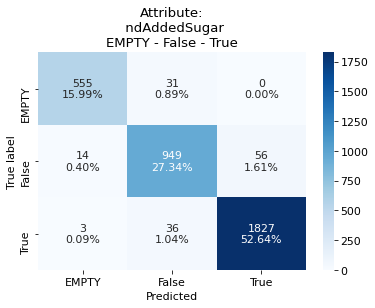

Confusion Matrix:
**************************
 [[ 555 31 0]
 [ 14 949 56]
 [ 3 36 1827]] 
**************************

Accuracy: 95.96658023624316
Classification report: precision recall f1-score support

 0 0.97 0.95 0.96 586
 1 0.93 0.93 0.93 1019
 2 0.97 0.98 0.97 1866

 accuracy 0.96 3471
 macro avg 0.96 0.95 0.96 3471
weighted avg 0.96 0.96 0.96 3471

[0.9552957549284032]

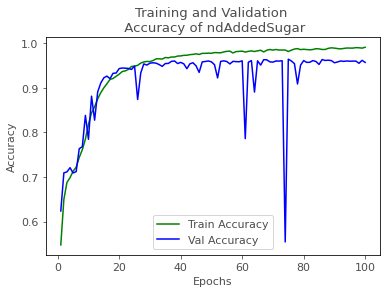

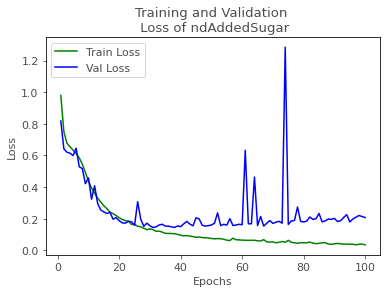

In [0]:
# Plot statistieken van de training fase
if multi_label_flag == True:
    plot_multiple_training(train_accuracies, val_accuracies, class_names, ATTRIBUUT, type_='Accuracy')
    plot_multiple_training(train_loss, val_loss, class_names, ATTRIBUUT, type_='Loss')
else:
    plot_single_label_training(model, model_history, Xtest_num, Xtest_text, ytest, ATTRIBUUT, DF_merged)
    